In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#loading pre trained model
model = load_model('model.h5')

In [3]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

train_generator=train.flow_from_directory('dataset-resized',
                                          target_size=(384,512),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory('dataset-resized',
                                        target_size=(384,512),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


Maximum Probability:  0.53836995
Classified: plastic


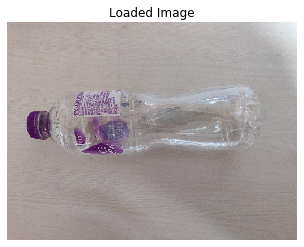

In [4]:
img_path = 'bottle2.jpg'

img = image.load_img(img_path, target_size=(384, 512))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

In [ ]:
import cv2

cam = cv2.VideoCapture(1)

cv2.namedWindow("test")

img_counter = 0
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)
    if not ret:
        break
    k = cv2.waitKey(1)

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "img.png"
        frame = increase_brightness(frame, value=50)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
           
        
        ## Prediction code
        img_path = 'img.png'
        img = image.load_img(img_path, target_size=(384, 512))
        img = image.img_to_array(img, dtype=np.uint8)
        img=np.array(img)/255.0
        
         
        plt.title("Loaded Image")
        plt.axis('off')
        plt.imshow(img.squeeze())

        p=model.predict(img[np.newaxis, ...])

        #print("Predicted shape",p.shape)
        print("Maximum Probability: ",np.max(p[0], axis=-1))
        predicted_class = labels[np.argmax(p[0], axis=-1)]
        print("Classified:",predicted_class)

cam.release()

cv2.destroyAllWindows()

img.png written!
Maximum Probability:  0.67623633
Classified: cardboard
img.png written!
Maximum Probability:  0.8141952
Classified: cardboard
img.png written!
Maximum Probability:  0.97007746
Classified: plastic
img.png written!
Maximum Probability:  0.58296126
Classified: paper
img.png written!
Maximum Probability:  0.62180007
Classified: paper
img.png written!
Maximum Probability:  0.81267434
Classified: cardboard
img.png written!
Maximum Probability:  0.99259466
Classified: cardboard
img.png written!
Maximum Probability:  0.7892061
Classified: paper
img.png written!
Maximum Probability:  0.7430082
Classified: paper
img.png written!
Maximum Probability:  0.87635386
Classified: cardboard
img.png written!
Maximum Probability:  0.9715176
Classified: cardboard
img.png written!
Maximum Probability:  0.6471089
Classified: plastic
img.png written!
Maximum Probability:  0.7584064
Classified: cardboard
img.png written!
Maximum Probability:  0.59334135
Classified: cardboard
img.png written!
M

(3456, 4608, 3)


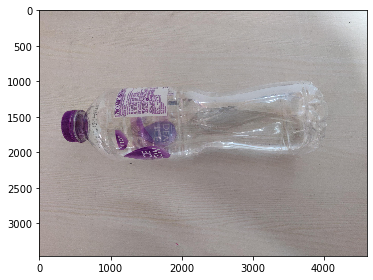

In [2]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('bottle2.jpg')
imshow(img)
print(img.shape)

(128, 64, 3)


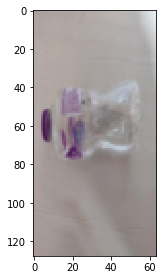

In [3]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [6]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

In [7]:
fd.shape

(3780,)

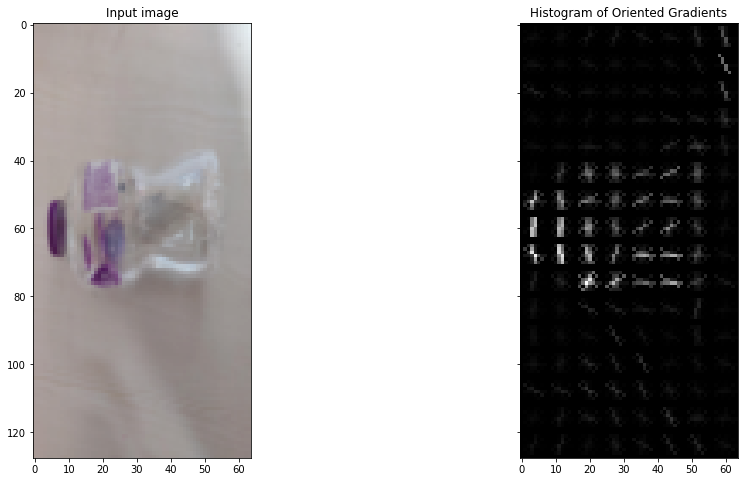

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [3]:
# Python program to explain cv2.imshow() method  
  
# importing cv2  
import cv2  
  
# path  

  
# Reading an image in default mode 
image = cv2.imread('bottle2.jpg') 
  
# Window name in which image is displayed 
window_name = 'image'
  
# Using cv2.imshow() method  
# Displaying the image  
cv2.imshow(window_name, image) 